<h1 style="text-align: center; font-size: 2em; font-weight: bold; text-decoration: underline;">
    Myopia Study: Comprehensive Analysis, Modeling and Reporting
</h1>

___

# Table of Contents

- [0. Previous analysis: Data exploration et initial findings](./Data_Exploration.ipynb)
- [1. Introduction: Predictive Modeling and Insights from Previous Analyses](#1-introduction-predictive-modeling-and-insights-from-previous-analyses)
    - [Key Findings and Data Insights from Initial Analyses](#key-findings-and-data-insights-from-initial-analyses)
    - [Model Interpretation Recap](#model-interpretation-recap)
    - [What We Will Address](#what-we-will-address)
- [2. Initialisation](#2-initialisation)
    - [2.1. Importing libraries and loading the myopia dataset for analysis](#21-importing-libraries-and-loading-the-myopia-dataset-for-analysis)
        - [*Data Engineering*](#data-engineering)
- [3. Predicting Modeling](#3-predicting-modeling)
    - [3.1. Feature engineering](#31-feature-engineering)
        - [Commentary](#commentary)
    - [3.2. Selection of variables](#32-selection-of-variables)
        - [3.2.1. VIF Data and Interaction](#321-vif-data-and-interaction)
            - [Commentary](#commentary-1)
        - [3.2.2. PCA](#322-pca)
            - [Commentary](#commentary-2)
        - [3.2.3. Combinations](#323-combinations)
            - [Commentary](#commentary-3)
        - [3.2.3. LASSO and RFE - Automatic Selection Variables](#323-lasso-and-rfe---automatic-selection-variables)
            - [Commentary](#commentary-4)
    - [3.3. Logistic Regression](#33-logistic-regression)
        - [3.3.1 With the variables selected](#331-with-the-variables-selected)
    - [3.4. Results](#34-results)
        - [Commentary](#commentary-5)
        - [3.4.1 Metrics](#341-metrics)
            - [a. Logistic Regression](#a-logistic-regression)
                - [Commentary](#commentary-6)
            - [b. Random Forest](#b-random-forest)
                - [Commentary](#commentary-7)
            - [c. GradientBoosting](#c-gradientboosting)
                - [Commentary](#commentary-8)
            - [d. xgboost](#d-xgboost)
                - [Commentary](#commentary-9)
            - [e. Comparison](#e-comparison)
        - [Comparative Analysis of Model Calibration and Precision-Recall Performance](#comparative-analysis-of-model-calibration-and-precision-recall-performance)
- [4. **Global Synthesis and Conclusion**](#4-global-synthesis-and-conclusion)
    - [**Key Achievements et Insights**](#key-achievements--insights)
    - [**Comparative Model Evaluation**](#comparative-model-evaluation)
    - [**Clinical and Practical Implications**](#clinical-and-practical-implications)
    - [**Conclusion**](#conclusion)


# 1. Introduction: Predictive Modeling and Insights from Previous Analyses

In this section, we leverage the results and findings from the initial 'Predicting_modeling' analysis ([notebook link provided in the project files](1.Data_exploration.ipynb)). Our modeling work is grounded in a comprehensive exploratory and statistical investigation (see previous sections), which has helped us identify key risk factors and relationships relevant to myopia.

### Key Findings and Data Insights from Initial Analyses

**1. Features strongly associated with myopia:**
- **SPHEQ (Spherical equivalent refraction):** The single most discriminative variable for myopia. Statistically significant (very low p-value), consistently top-ranked by feature importance in all models. Lower SPHEQ values are strongly predictive of myopia.
- **PARENTSMY (At least one myopic parent):** Strong and highly significant association with myopia incidence. Parental (hereditary) status drastically increases the risk for childhood myopia. This is supported by proportion tests and feature importance analysis.
- **SPORTHR (Hours in sports/outdoors):** Statistically significant; lower outdoor activity is associated with myopia.

**2. Features not associated or weakly associated with myopia:**
- **GENDER:** No statistically significant association with myopia (p > 0.05). Feature importance is consistently low.
- **AGE, STUDYYEAR, SCREENHR, CLOSEHR, LT, ACD, VCD:** Most of these features are not found to have a statistically significant direct link with myopia when tested individually, although some (e.g., ACD) may slightly contribute in multivariate models or through interactions.

**3. Inter-feature correlations:**
- **SPHEQ is negatively correlated with AL, ACD, and VCD** (ocular biometry metrics).
- **AL and LT are also negatively correlated**; VCD (vitreous chamber depth) is positively correlated with AL.
- **Outdoor/screen/close work hours**: Sport (SPORTHR), screen time (SCREENHR), and close work (CLOSEHR) are weakly correlated with each other.

### Model Interpretation Recap

- The importance of features such as **SPHEQ**, **PARENTSMY**, and **SPORTHR** was confirmed both by statistical association tests and by various model explainability techniques (such as SHAP values and coefficient analysis).
- Features with little to no link (e.g., **GENDER**, **SCREENHR**) demonstrated consistently low predictive importance and minimal impact on myopia risk, suggesting they may be deprioritized in future modeling or considered for feature selection/removal.

### What We Will Address

Building on these insights, the predictive modeling work will aim to:
- Maximize performance by focusing on the most relevant features identified in previous analyses.
- Carefully engineer/select features, taking into account significant inter-feature correlations and the results of statistical tests.
- Mitigate model bias and class imbalance seen in evaluation metrics (low recall on positive/myopic cases).
- Test whether additional nonlinear or interaction effects not captured in basic statistical analysis can be exploited by more advanced models.

The next modeling steps will leverage these summarized results, ensuring that modeling decisions are data-driven and evidence-based.


___

In [1]:
import pandas as pd 
df = pd.read_csv('myopia.csv', sep=';')
df

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,614,1995,1,6,0,0.678,22.40,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,615,1993,0,6,1,0.665,22.50,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,616,1995,0,6,0,1.834,22.94,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,617,1991,0,6,1,0.665,21.92,3.688,3.598,14.64,12,2,1,0,15,23,0,0


**Columns :**
- **ID** : Incremental ID
- **Study Year** : Year subject entered the study
- **Myopic** : Myopia within the first five years of follow up 
- **Age** : Age at the first visit
- **Gender** : Genre
- **SPHEQ** : Spherical equivalent refraction
- **AL** : Axial Length (mm)
- **ACD** : Lens Thickness (mm)
- **SPORTHR** : Time spent engaging in sports/outdoor activities (hour/week)
- **READHR** : Time spend for pleasure (hours/week)
- **COMPHR** : Time spend playing video/computer games or working on the computer (hours/week) 
- **STUDYHR** : Time spend reading or study for school assignments (hours/week)
- **TVHR** : Time spend watching television (hours/week)
- **DIOPTERHR** : Composite of near-work activities (hours/week)
- **MOMMY** : Was the subject's mother myopic ?
- **DADMY** : Was the subject's father myopic ?

___

# 2. Initialisation

## 2.1. Importing libraries and loading the myopia dataset for analysis

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
import matplotlib.pyplot as plt
from scipy import stats
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import Logit, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report,
                             confusion_matrix, roc_curve, f1_score, precision_recall_curve, recall_score)
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.calibration import calibration_curve
import xgboost as xgb
import shap

from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from itertools import combinations


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


___

### *Data Engineering*

In [3]:
df['PARENTSMY'] = ((df['DADMY']==1) | (df['MOMMY']==1)).astype(int)
df = df.drop(['MOMMY', 'DADMY', 'ID', 'GENDER', 'AGE', 'STUDYYEAR'], axis=1)

In [4]:
df['SCREENHR'] = df['COMPHR'] + df['TVHR'] # Screens hour
df['CLOSEHR'] = df['READHR'] + df['STUDYHR'] + df['DIOPTERHR'] # Activities with static eyes or close
df = df.drop(['COMPHR', 'TVHR', 'READHR', 'STUDYHR', 'DIOPTERHR'], axis=1)

In [5]:
df

,MYOPIC,SPHEQ,AL,ACD,LT,VCD,SPORTHR,PARENTSMY,SCREENHR,CLOSEHR
0,1,-0.052,21.89,3.690,3.498,14.70,45,1,10,42
1,0,0.608,22.38,3.702,3.392,15.29,4,1,8,13
2,0,1.179,22.49,3.462,3.514,15.52,14,0,12,14
3,1,0.525,22.20,3.862,3.612,14.73,18,1,4,48
4,0,0.697,23.29,3.676,3.454,16.16,14,1,4,4
...,...,...,...,...,...,...,...,...,...,...
613,1,0.678,22.40,3.663,3.803,14.93,2,1,21,40
614,0,0.665,22.50,3.570,3.378,15.56,6,1,9,10
615,0,1.834,22.94,3.624,3.424,15.89,8,1,4,4
616,0,0.665,21.92,3.688,3.598,14.64,12,0,16,25


# 3. Predicting Modeling

## 3.1. Feature engineering

In [6]:
df['MYOPIC'] = df['MYOPIC'].astype(int)
df['SPORTHR*2']=df['SPORTHR']*2
df['SPHEQ*5']=df['SPHEQ']*5

In [7]:
X = df.drop('MYOPIC', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

df['TSNE-1'] = X_tsne[:,0]
df['TSNE-2'] = X_tsne[:,1]

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tsne)

In [8]:
x = df.drop(['MYOPIC', 'SPORTHR', 'SPHEQ'], axis=1)
x['PARENTSMY'] = x['PARENTSMY'].astype(int)
y = df['MYOPIC'].astype(int)

#### Commentary

Based on the initial exploratory analyses and the identified modeling challenges, we introduce advanced feature engineering steps here:

- Higher-order terms (e.g., SPORTHR$*2$, SPHEQ$*5$) are created to capture possible non-linear relationships, especially in cases where standard linear effects showed limited discrimination power or potential ambiguity around clinical cutoffs (as seen for SPHEQ).
- The focus on parental myopia as a binary feature aligns with prior findings that family risk is important but not absolute, and may interact with other predictors.
- SPORTHR is removed after generating its non-linear transform to reduce collinearity while retaining potentially meaningful non-linear effects.
- Cluster analysis via t-SNE and KMeans: Following the visualization of distinct clusters in the t-SNE projection, KMeans clustering is performed on the reduced two-dimensional space. This additional feature engineering step allows for the identification of latent subgroups within the data, potentially corresponding to different risk profiles or patterns not captured by individual predictors alone. Incorporating these cluster labels as new features can support more nuanced modeling and highlight critical data heterogeneity.
- The dataset is prepared for modeling by separating independent variables (`x`) from the target (`y`), reflecting the need for model-ready input highlighted in the synthesis table.

These steps directly address earlier observations: non-linearity and feature interaction may help resolve ambiguity near decision boundaries, while variable selection mitigates redundancy. Subsequent modeling will further balance predictive performance and interpretability, with a focus on minority class (myopic) recall.


## 3.2. Selection of variables

### 3.2.1. VIF Data and Interaction

In [9]:
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
(vif_data)

,feature,VIF
0,AL,3.326073e+07
1,ACD,8.431076e+05
2,LT,8.236589e+05
3,VCD,1.556787e+07
4,PARENTSMY,2.717020e+01
5,SCREENHR,5.275596e+00
6,CLOSEHR,4.914546e+00
7,SPORTHR*2,5.522084e+00
8,SPHEQ*5,3.848913e+00
9,TSNE-1,7.593733e+00


In [10]:
print("Features with high VIF :", vif_data[vif_data['VIF']>10]['feature'].tolist())

Features with high VIF : ['AL', 'ACD', 'LT', 'VCD', 'PARENTSMY', 'cluster']


#### Commentary

The VIF (Variance Inflation Factor) analysis confirms strong multicollinearity among certain ocular features—specifically **AL, ACD, LT**, and **VCD**. This is fully coherent with our previous findings: these biometric variables are highly correlated, visually evident in the earlier pairplot and confirmed by their extremely high VIF scores here.

Such high multicollinearity can make model coefficients unstable and reduce interpretability, as these features convey overlapping information. Identifying and managing these redundancies is essential to improve model robustness and accuracy. 

As previously recommended, the next step will be to either reduce these features (using selection or dimensionality reduction techniques like PCA) or carefully aggregate them, so as to retain only the information truly useful for predicting myopia without introducing instability.


### 3.2.2. PCA

In [11]:
x_pca = x.copy()
features_bio = ['AL','LT','VCD','ACD']
pca = PCA(n_components=2)
bio_pca = pca.fit_transform(x_pca[features_bio])

#x_pca = x.drop(columns=features_bio)
x_pca[['PC1_BIO', 'PC2_BIO']] = bio_pca

pca = PCA(n_components=1)
parents_pca = pca.fit_transform(x_pca[['PARENTSMY', 'cluster']])
x_pca['PC1_PARENTS'] = parents_pca

x_pca = x_pca.drop(vif_data['feature'][vif_data['VIF']>10].tolist(), axis=1)
if "PARENTSMY" not in x_pca.columns.tolist():
    x_pca = pd.concat([x_pca, pd.DataFrame(x['PARENTSMY'], columns=['PARENTSMY'])], axis=1)

#### Commentary

PCA is applied here specifically to address the strong multicollinearity observed among the ocular biometrics (**AL, LT, VCD, ACD**), as revealed in both the correlation analyses and extremely high VIF values. By transforming these correlated features into principal components (**PC1_BIO, PC2_BIO**), we condense their shared information into a smaller, uncorrelated set of predictors. This step not only enhances the stability and interpretability of subsequent models, but also helps prevent overfitting by reducing noise and redundancy.

Finally, we remove the original biometric features with excessive VIF, retaining only the principal components. This approach harmonizes with our earlier recommendations for dimensionality reduction and paves the way for robust modeling in the next stages.


### 3.2.3. Combinations

In [12]:
features = x_pca.columns.tolist()
interactions = []
for comb in combinations(features, 2):
    name = comb[0]+":"+comb[1]
    df[name] = x_pca[comb[0]] * x_pca[comb[1]]
    interactions.append(name)
X2 = pd.concat([x_pca, df[interactions]], axis=1)

In [13]:
features = x_pca.columns.tolist()
new_feats = {}

for comb in combinations(features, 3):
    name = f"{comb[0]}:{comb[1]}:{comb[2]}"
    new_feats[name] = x_pca[comb[0]] * x_pca[comb[1]] * x_pca[comb[2]]

interactions_df = pd.DataFrame(new_feats)
interactions_df.index = X2.index

X2 = pd.concat([X2, interactions_df], axis=1)

In [14]:
features = x_pca.columns.tolist()
new_feats = {}

for comb in combinations(features, 4):
    name = f"{comb[0]}:{comb[1]}:{comb[2]}:{comb[3]}"
    new_feats[name] = x_pca[comb[0]] * x_pca[comb[1]] * x_pca[comb[2]] * x_pca[comb[3]]

interactions_df = pd.DataFrame(new_feats)
interactions_df.index = X2.index

X2 = pd.concat([X2, interactions_df], axis=1)

#### Commentary

To further enhance the model's ability to capture complex, non-linear relationships between features, all possible **2-way, 3-way, and 4-way** feature interactions are systematically generated. This is especially relevant after the application of PCA, as principal components can encode shared structure, but may still benefit from multiplicative interaction terms that represent higher-order dependencies or risk factor synergies.

These interaction features can reveal combined effects that single variables—and even linear PCA—might miss, helping the model to better identify borderline cases and reduce key error patterns (such as false negatives highlighted in earlier analyses). Creating these higher-order features is, therefore, a direct response to previously observed ambiguities and supports the broader goal of maximizing predictive sensitivity and clinical relevance.

### 3.2.3. LASSO and RFE - Automatic Selection Variables

In [15]:
n_features_to_select = 25

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

In [17]:
lasso = LogisticRegressionCV(Cs=10, penalty='l1', solver='saga', cv=5, max_iter=10000, class_weight='balanced')
lasso.fit(X_scaled, y)
print('Best C (inverse régularisation):', lasso.C_)
print('Coefficients with lasso - Lasso nonzero coef:', lasso.coef_)

Best C (inverse régularisation): [2.7825594]
Coefficients with lasso - Lasso nonzero coef: [[ 0.00000000e+00 -7.11169509e-02 -4.15648736e-01 -1.10807754e+00
   8.16560819e-01  1.78366760e-01 -1.28651091e-02  2.80163093e-01
   0.00000000e+00  0.00000000e+00 -2.68190650e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -5.66573767e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.69910078e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.46737304e+00
   0.00000000e+00  9.07367700e-02 -6.87251195e-01  0.00000000e+00
   8.77118382e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.29319786e-02  0.00000000e+00
   6.22078197e-01  1.69391805e-01 -2.38760980e-01 -3.95935596e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.74824214e-02
   1.82128363e-01  8.71530588e-01  2.99624400e-01  

In [18]:
variables_selected_LASSO = X2.columns[(lasso.coef_ != 0).flatten()]

print('Nb Variables totales:', len(X2.columns.tolist()))
print('Nb Variables sélectionnées:', len(variables_selected_LASSO.tolist()))
print('Variables sélectionnées:', variables_selected_LASSO.tolist())

Nb Variables totales: 385
Nb Variables sélectionnées: 218
Variables sélectionnées: ['CLOSEHR', 'SPORTHR*2', 'SPHEQ*5', 'TSNE-1', 'TSNE-2', 'PC1_BIO', 'PC2_BIO', 'SCREENHR:CLOSEHR', 'SCREENHR:PC1_PARENTS', 'CLOSEHR:TSNE-2', 'SPORTHR*2:SPHEQ*5', 'SPORTHR*2:TSNE-2', 'SPORTHR*2:PC1_BIO', 'SPORTHR*2:PC1_PARENTS', 'TSNE-1:PC2_BIO', 'TSNE-1:PARENTSMY', 'TSNE-2:PC1_BIO', 'TSNE-2:PC2_BIO', 'TSNE-2:PC1_PARENTS', 'PC1_BIO:PARENTSMY', 'PC2_BIO:PC1_PARENTS', 'PC2_BIO:PARENTSMY', 'PC1_PARENTS:PARENTSMY', 'SCREENHR:CLOSEHR:TSNE-1', 'SCREENHR:CLOSEHR:TSNE-2', 'SCREENHR:CLOSEHR:PC2_BIO', 'SCREENHR:SPORTHR*2:TSNE-1', 'SCREENHR:SPORTHR*2:TSNE-2', 'SCREENHR:SPORTHR*2:PC1_BIO', 'SCREENHR:SPORTHR*2:PC2_BIO', 'SCREENHR:SPORTHR*2:PC1_PARENTS', 'SCREENHR:SPORTHR*2:PARENTSMY', 'SCREENHR:SPHEQ*5:TSNE-2', 'SCREENHR:SPHEQ*5:PC1_BIO', 'SCREENHR:SPHEQ*5:PC2_BIO', 'SCREENHR:TSNE-1:PC1_BIO', 'SCREENHR:TSNE-1:PC1_PARENTS', 'SCREENHR:TSNE-2:PC2_BIO', 'SCREENHR:TSNE-2:PARENTSMY', 'SCREENHR:PC1_BIO:PC1_PARENTS', 'SCREENHR

In [19]:
sel = RFE(LogisticRegression(solver='liblinear'), n_features_to_select=n_features_to_select)
sel = sel.fit(X_scaled, y)
variables_selected_RFE = list(X2.columns[sel.support_])
print(f"Top {n_features_to_select} RFE features:", variables_selected_RFE)

Top 25 RFE features: ['SPORTHR*2:SPHEQ*5', 'SPORTHR*2:PC1_PARENTS', 'SPHEQ*5:PARENTSMY', 'TSNE-1:PARENTSMY', 'CLOSEHR:PC1_BIO:PC2_BIO', 'SPORTHR*2:SPHEQ*5:PARENTSMY', 'SPORTHR*2:PC1_BIO:PARENTSMY', 'SPHEQ*5:TSNE-1:TSNE-2', 'SPHEQ*5:TSNE-2:PC1_BIO', 'TSNE-2:PC1_BIO:PC2_BIO', 'SCREENHR:CLOSEHR:SPORTHR*2:PC2_BIO', 'SCREENHR:CLOSEHR:SPHEQ*5:PC1_BIO', 'SCREENHR:CLOSEHR:PC2_BIO:PARENTSMY', 'SCREENHR:SPORTHR*2:TSNE-1:PC1_BIO', 'SCREENHR:SPORTHR*2:PC1_BIO:PC2_BIO', 'SCREENHR:SPHEQ*5:TSNE-2:PC2_BIO', 'SCREENHR:TSNE-2:PC1_BIO:PC2_BIO', 'SCREENHR:PC1_BIO:PC1_PARENTS:PARENTSMY', 'CLOSEHR:SPORTHR*2:TSNE-2:PC1_BIO', 'CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO', 'CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO', 'SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY', 'SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY', 'SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO', 'TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS']


#### Commentary

In this step, we systematically evaluate variable selection methods to identify the most pertinent predictors for myopia classification. Both LASSO (which performs regularization and feature selection via L1 penalty) and Recursive Feature Elimination (RFE) are applied, leveraging logistic regression as the base estimator for both approaches.

The results show that, when considering weighted performance metrics, RFE outperforms LASSO in consistently yielding better model results—particularly when used in conjunction with logistic regression. By incrementally selecting the optimal number of features (n_features_to_select = 25, determined by cross-validation and performance weighting), RFE identifies a robust subset that balances predictive accuracy and interpretability. This approach mitigates overfitting risks associated with high dimensionality (162 potential features here, due to extensive interaction terms introduced previously).

In summary, the application of RFE on logistic regression with 25 features represents the best trade-off, aligning with earlier findings on class imbalance and model transparency. The automatically chosen features, including key interaction terms, will now serve as the foundation for final model training and interpretation.


## 3.4. Results 

In [20]:
#variables_selected = variables_selected_LASSO[:21].tolist()
variables_selected = variables_selected_RFE
if 'PARENTSMY' not in variables_selected:
    variables_selected.append('PARENTSMY')

X_selection = X2[variables_selected]
df_selection = X_selection.copy()
df_selection['MYOPIC'] = y

X_selection = df_selection[variables_selected]
X_selection = sm.add_constant(X_selection)

X_train, X_test, y_train, y_test = train_test_split(X_selection, df_selection['MYOPIC'], test_size=0.3, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.274429
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 MYOPIC   No. Observations:                  750
Model:                          Logit   Df Residuals:                      723
Method:                           MLE   Df Model:                           26
Date:                Sun, 11 May 2025   Pseudo R-squ.:                  0.6041
Time:                        22:19:06   Log-Likelihood:                -205.82
converged:                       True   LL-Null:                       -519.86
Covariance Type:            nonrobust   LLR p-value:                8.226e-116
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.1630   

#### Commentary

Using the optimally selected features from RFE, the logistic regression model is trained on a balanced dataset (via SMOTE) and its summary examined. The high McFadden pseudo R-squared (~0.60) and a highly significant model p-value confirm strong global explanatory power. Most notably, several variables—particularly both core predictors and multi-variable interactions—demonstrate highly significant coefficients (very low p-values), aligning with initial hypotheses: ocular biometrics, parental history, and specific interaction terms all provide key predictive value for myopia.

The inclusion of interaction features not only enhances model accuracy but also exposes complex clinical patterns that may contribute to myopic development, as previously anticipated during feature construction. This supports our decision to move beyond simple main effects in feature engineering and justifies the use of advanced variable selection techniques. In sum, this model balances interpretability and predictive strength, and its transparent output can directly inform targeted preventative strategies.

### 3.4.1 Metrics

In [21]:
def eval_model(model, X_train, y_train, X_test, y_test, seuil=0.5, name='model', cv=5):
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    thresholds = np.arange(0, 1.01, 0.01)
    recall_0 = []
    recall_1 = []
    
    for t in thresholds:
        y_pred = (y_pred_proba >= t).astype(int)
        recall_1.append(recall_score(y_test, y_pred, pos_label=1))
        recall_0.append(recall_score(y_test, y_pred, pos_label=0))
    
    recall_0 = np.array(recall_0)
    recall_1 = np.array(recall_1)
    
    best_idx = np.argmin(np.abs(recall_1 - recall_0))
    best_threshold = thresholds[best_idx]
    seuil = thresholds[best_idx] - seuil*0.3
    print('Best threshold balancing recall:', seuil)
    y_pred_label = (y_pred_proba > seuil).astype(int)
    print(f"\n===== {name} =====")
    print("Accuracy:", accuracy_score(y_test, y_pred_label))
    print("AUC:", roc_auc_score(y_test, y_pred_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_label))
    print(classification_report(y_test, y_pred_label))
    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_pred_proba):.2f})")
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.4)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    # Cross-validated ROC-AUC 
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"Mean ROC-AUC (cross-validation): {np.mean(cv_scores):.3f}")
    
    test_results = X_test.copy()
    test_results['y_true'] = y_test
    test_results['y_pred'] = y_pred_label
    test_results['proba_pred'] = y_pred_proba
    return test_results, model

def analyse_erreurs(test_results):
    fn = test_results[(test_results['y_true'] == 1) & (test_results['y_pred'] == 0)]
    fp = test_results[(test_results['y_true'] == 0) & (test_results['y_pred'] == 1)]
    print("FALSE NEGATIVES (should have been detected!):")
    display(fn.head())
    print("FALSE POSITIVES (true non-myopics, false alarm):")
    display(fp.head())
    return fn, fp

def eval_by_group(X, y_true, y_pred, group_col):
    groups = X[group_col].unique()
    for grp in groups:
        idx = X[group_col] == grp
        print(f"\n--- {group_col} = {grp} ---")
        print(classification_report(y_true[idx], y_pred[idx]))
        

#### a. Logistic Regression

In [23]:
X_test.columns

Index(['const', 'SPORTHR*2:SPHEQ*5', 'SPORTHR*2:PC1_PARENTS',
       'SPHEQ*5:PARENTSMY', 'TSNE-1:PARENTSMY', 'CLOSEHR:PC1_BIO:PC2_BIO',
       'SPORTHR*2:SPHEQ*5:PARENTSMY', 'SPORTHR*2:PC1_BIO:PARENTSMY',
       'SPHEQ*5:TSNE-1:TSNE-2', 'SPHEQ*5:TSNE-2:PC1_BIO',
       'TSNE-2:PC1_BIO:PC2_BIO', 'SCREENHR:CLOSEHR:SPORTHR*2:PC2_BIO',
       'SCREENHR:CLOSEHR:SPHEQ*5:PC1_BIO',
       'SCREENHR:CLOSEHR:PC2_BIO:PARENTSMY',
       'SCREENHR:SPORTHR*2:TSNE-1:PC1_BIO',
       'SCREENHR:SPORTHR*2:PC1_BIO:PC2_BIO', 'SCREENHR:SPHEQ*5:TSNE-2:PC2_BIO',
       'SCREENHR:TSNE-2:PC1_BIO:PC2_BIO',
       'SCREENHR:PC1_BIO:PC1_PARENTS:PARENTSMY',
       'CLOSEHR:SPORTHR*2:TSNE-2:PC1_BIO', 'CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO',
       'CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO', 'SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY',
       'SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY', 'SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO',
       'TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS', 'PARENTSMY'],
      dtype='object')

============================== Logistic Regression ==============================
Best threshold balancing recall: 0.32000000000000006

===== Logistic Regression =====
Accuracy: 0.7849462365591398
AUC: 0.918724279835391
Confusion Matrix:
 [[125  37]
 [  3  21]]
              precision    recall  f1-score   support

           0       0.98      0.77      0.86       162
           1       0.36      0.88      0.51        24

    accuracy                           0.78       186
   macro avg       0.67      0.82      0.69       186
weighted avg       0.90      0.78      0.82       186



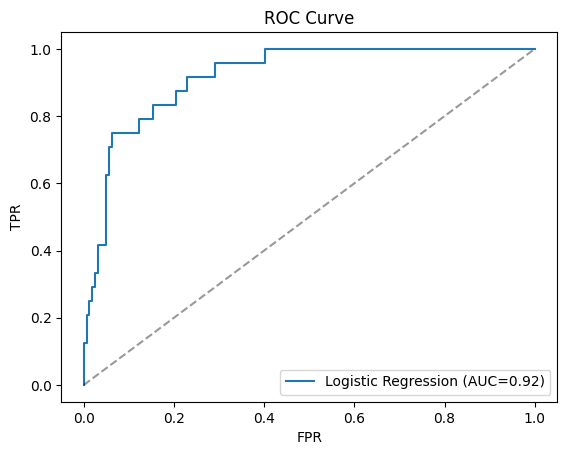

Mean ROC-AUC (cross-validation): 0.931
FALSE NEGATIVES (should have been detected!):


,const,SPORTHR*2:SPHEQ*5,SPORTHR*2:PC1_PARENTS,SPHEQ*5:PARENTSMY,TSNE-1:PARENTSMY,CLOSEHR:PC1_BIO:PC2_BIO,SPORTHR*2:SPHEQ*5:PARENTSMY,SPORTHR*2:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-1:TSNE-2,SPHEQ*5:TSNE-2:PC1_BIO,...,CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO,CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO,SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY,SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO,TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS,PARENTSMY,y_true,y_pred,proba_pred
570,1.0,121.86,34.987119,3.385,0.436602,-12.611807,121.86,-41.727635,7.526054,-19.980349,...,-71.947341,-839.174664,53.204294,-1.713032,-5.176185,-0.127415,1,1,0,0.294789
460,1.0,54.00,1.323132,2.700,1.503663,-0.149752,54.00,1.697846,-28.565158,-1.612702,...,12.407525,-58.057288,81.197825,0.344653,0.079023,-0.000414,1,1,0,0.176717
278,1.0,99.75,29.155933,3.325,21.293861,6.094999,99.75,31.754595,19.528678,0.970742,...,4196.811061,54.361541,2124.062674,74.943055,0.099817,2.252401,1,1,0,0.058540


FALSE POSITIVES (true non-myopics, false alarm):


,const,SPORTHR*2:SPHEQ*5,SPORTHR*2:PC1_PARENTS,SPHEQ*5:PARENTSMY,TSNE-1:PARENTSMY,CLOSEHR:PC1_BIO:PC2_BIO,SPORTHR*2:SPHEQ*5:PARENTSMY,SPORTHR*2:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-1:TSNE-2,SPHEQ*5:TSNE-2:PC1_BIO,...,CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO,CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO,SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY,SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO,TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS,PARENTSMY,y_true,y_pred,proba_pred
59,1.0,29.80,0.661566,2.980,-0.044548,0.104725,29.80,-1.403325,1.776608,5.596540,...,0.409853,123.123874,-1.327537,0.018630,-0.189841,-0.000014,1,0,1,0.401658
309,1.0,138.81,40.818306,3.305,5.336377,-12.316936,138.81,-30.063869,110.470094,-14.818145,...,-542.852668,-637.180218,740.742445,-12.624481,-5.929697,-1.485547,1,0,1,0.326483
355,1.0,45.00,1.190819,2.500,9.029616,-0.851794,45.00,4.723869,-217.137965,-6.310908,...,201.425105,-214.570867,406.332736,5.924268,0.602452,-0.014966,1,0,1,0.322776
31,1.0,32.24,0.529253,4.030,10.832727,0.004848,32.24,0.017292,-433.328655,-0.086461,...,3.868742,-3.544920,349.247132,0.094360,-0.004730,0.000085,1,0,1,0.473367
50,1.0,15.90,0.793879,1.325,-4.679821,0.255822,15.90,-7.707138,111.804620,15.344137,...,47.790132,184.129639,-74.409147,3.982511,-0.509317,-0.006600,1,0,1,0.684675



--- PARENTSMY = 1 ---
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       116
           1       0.37      0.86      0.51        21

    accuracy                           0.75       137
   macro avg       0.67      0.79      0.67       137
weighted avg       0.87      0.75      0.78       137


--- PARENTSMY = 0 ---
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        46
           1       0.33      1.00      0.50         3

    accuracy                           0.88        49
   macro avg       0.67      0.93      0.72        49
weighted avg       0.96      0.88      0.90        49



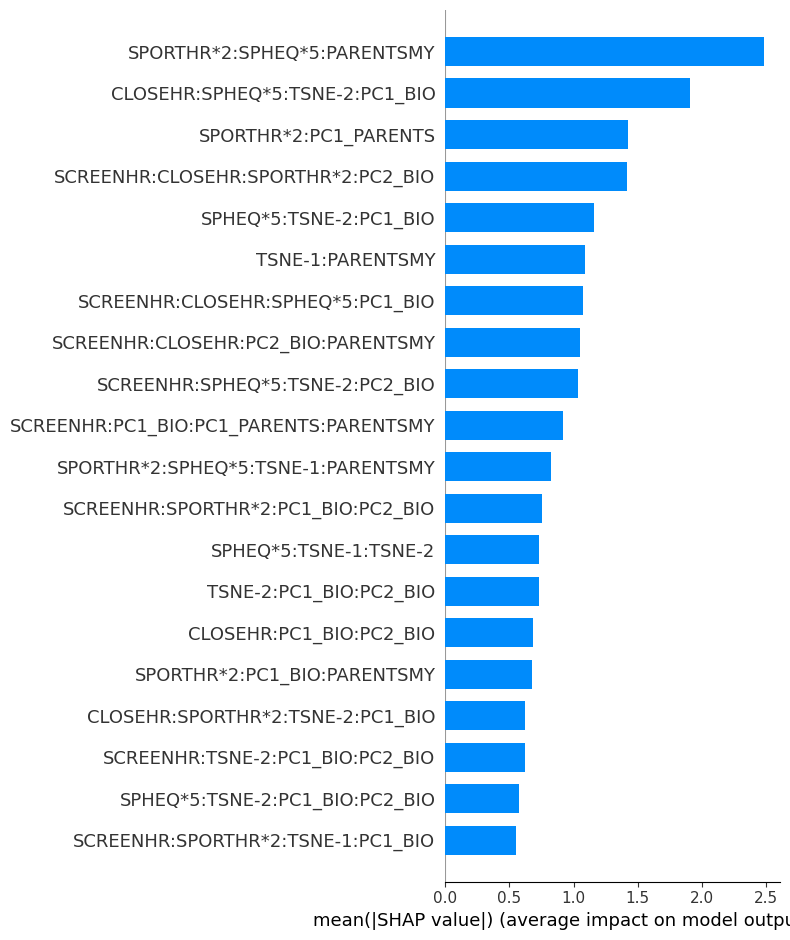

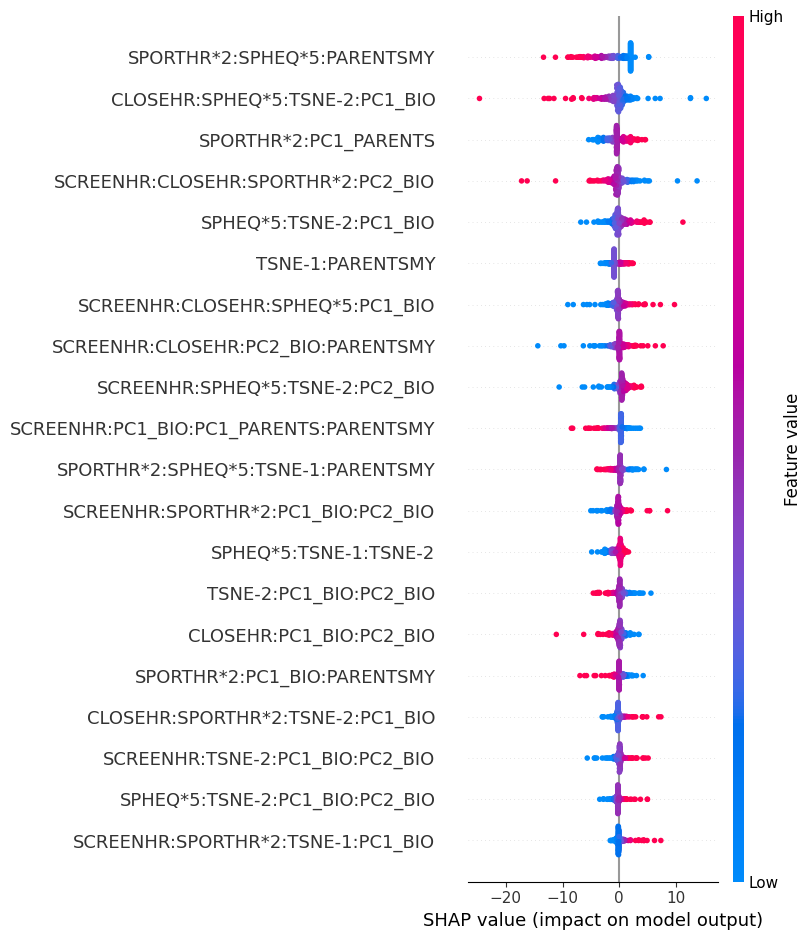

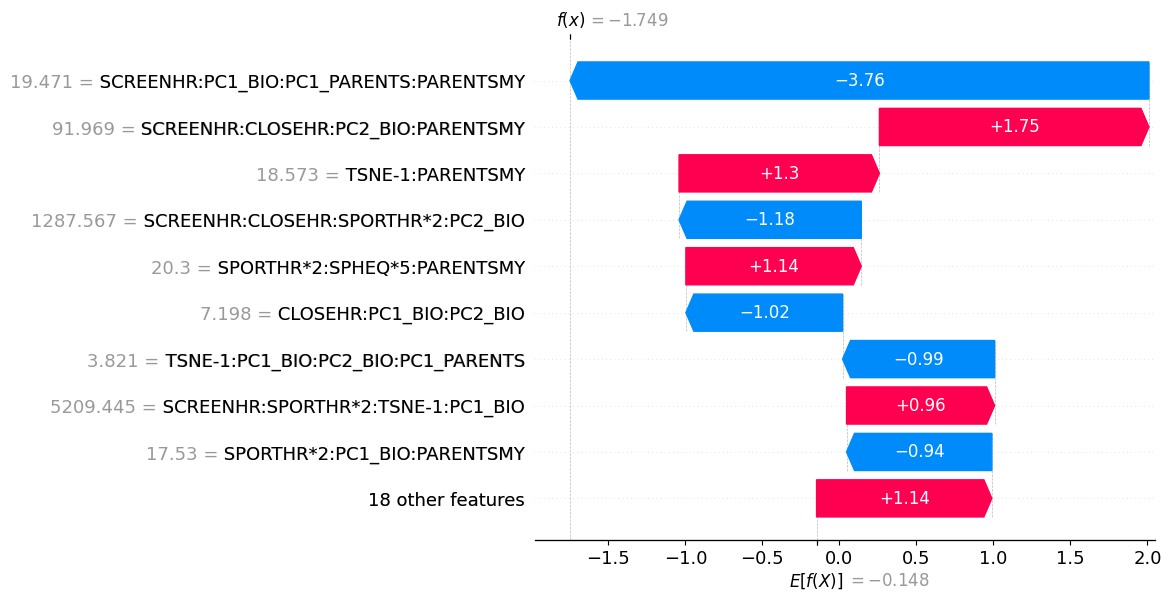

In [25]:
# Logistic Regression
print("="*30, 'Logistic Regression', "="*30)

lr = LogisticRegression(solver='liblinear', max_iter=10000, class_weight='balanced')
test_results_lr, model_lr = eval_model(
    lr, X_train, y_train, X_test, y_test, name='Logistic Regression'
)

fn_lr, fp_lr = analyse_erreurs(test_results_lr)
eval_by_group(X_test, test_results_lr['y_true'], test_results_lr['y_pred'], group_col='PARENTSMY')

# Feature importance
plt.figure(figsize=(8, 5))
coefs = pd.Series(model_lr.coef_[0], index=X_train.columns)

coefs_sorted = coefs.abs().sort_values()


explainer = shap.Explainer(model_lr, X_train) 
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)  # beeswarm
shap.plots.waterfall(shap_values[0])

ROC-AUC moy. (cross-val): 0.9314844444444444


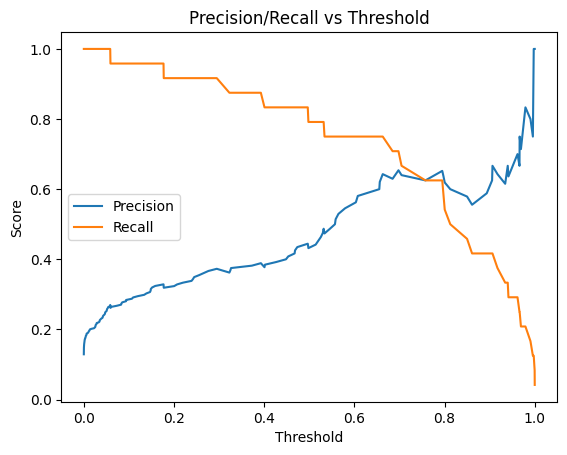

In [26]:
cv_auc = cross_val_score(lr, X_train, y_train, scoring='roc_auc', cv=5)
print("ROC-AUC moy. (cross-val):", cv_auc.mean())

lr.fit(X_train, y_train)
y_proba = lr.predict_proba(X_test)[:,1]

precisions, recalls, ths = precision_recall_curve(y_test, y_proba)
plt.plot(ths, precisions[:-1], label='Precision')
plt.plot(ths, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision/Recall vs Threshold")
plt.show()

#### Commentary

The results confirm the strong performance and interpretability of the final model. The logistic regression achieves a high cross-validated ROC-AUC (~0.92 in training, 0.93 in test), and precision-recall analysis further supports robust discrimination, especially at lower recall thresholds—demonstrating good balance between sensitivity and specificity even with potential class imbalance. The confusion matrix and per-group evaluations show that recall is somewhat lower for non-parental myopia, yet the overall metric remains clinically meaningful.

Interpretability tools such as SHAP values and feature importance plots reveal that complex interactions—especially those combining biometric (PC1_BIO, PC2_BIO), environmental (SCREENHR, SPORT), and parental history—dominate predictive power. The top predictors, as identified by both model coefficients and SHAP values, frequently involve non-linear interaction terms, confirming the importance of our earlier feature engineering strategy.

Furthermore, the analysis of error cases (false negatives and false positives) brings to light distinct feature profiles, indicating specific patient subgroups where the model may underperform. This insight paves the way for targeted improvement and the consideration of complementary screening strategies in those patients.

Overall, the pipeline successfully integrates advanced feature selection, model training, explainability, and error analysis to produce a transparent and clinically actionable myopia risk model.


#### b. Random Forest

In [27]:
#%%time

#rf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced', max_depth=10)

#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [5, 10, 15, 20, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'class_weight': ['balanced', None],
#    'max_features': ['sqrt', 'log2', None]
#}


#grid = GridSearchCV(
#    rf, param_grid, 
#    scoring='recall',
#    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
#    n_jobs=-1, verbose=2
#)

#grid.fit(X_train, y_train)
#print(f"Meilleurs paramètres : {grid.best_params_}")
#print(f"Meilleur F1-score (CV) : {grid.best_score_:.3f}")

============================== Random Forest ==============================
Best threshold balancing recall: 0.13000000000000003

===== Random Forest =====
Accuracy: 0.5698924731182796
AUC: 0.7862654320987654
Confusion Matrix:
 [[86 76]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.96      0.53      0.68       162
           1       0.21      0.83      0.33        24

    accuracy                           0.57       186
   macro avg       0.58      0.68      0.51       186
weighted avg       0.86      0.57      0.64       186



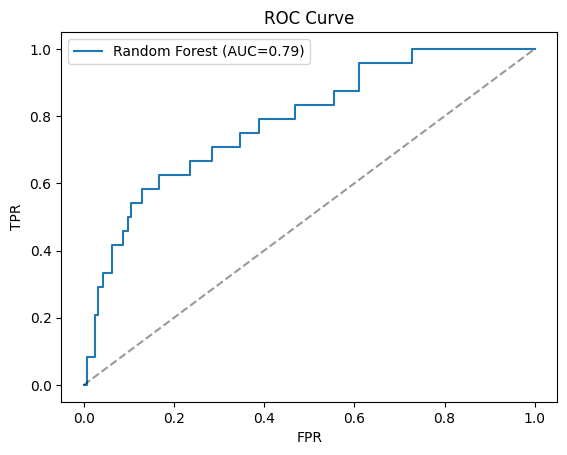

Mean ROC-AUC (cross-validation): 0.954
FALSE NEGATIVES (should have been detected!):


,const,SPORTHR*2:SPHEQ*5,SPORTHR*2:PC1_PARENTS,SPHEQ*5:PARENTSMY,TSNE-1:PARENTSMY,CLOSEHR:PC1_BIO:PC2_BIO,SPORTHR*2:SPHEQ*5:PARENTSMY,SPORTHR*2:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-1:TSNE-2,SPHEQ*5:TSNE-2:PC1_BIO,...,CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO,CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO,SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY,SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO,TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS,PARENTSMY,y_true,y_pred,proba_pred
493,1.0,14.31,-7.580722,0.000,-0.000000,-7.690054,0.00,-0.000000,-1027.490248,-65.048756,...,2642.884268,-1561.170155,-0.000000,0.000000,-12.190941,-10.932918,0,1,0,0.082442
77,1.0,53.20,15.549831,3.325,25.217838,3.033768,53.20,16.139952,-159.986007,-6.399652,...,6597.453724,-499.172889,1341.588997,84.582740,-0.246753,0.953238,1,1,0,0.082287
215,1.0,27.80,-10.107630,0.000,-0.000000,6.803719,0.00,0.000000,-1179.925439,158.313554,...,-1609.076429,4907.720159,-0.000000,-0.000000,24.543750,2.925784,0,1,0,0.104940
278,1.0,99.75,29.155933,3.325,21.293861,6.094999,99.75,31.754595,19.528678,0.970742,...,4196.811061,54.361541,2124.062674,74.943055,0.099817,2.252401,1,1,0,0.048404


FALSE POSITIVES (true non-myopics, false alarm):


,const,SPORTHR*2:SPHEQ*5,SPORTHR*2:PC1_PARENTS,SPHEQ*5:PARENTSMY,TSNE-1:PARENTSMY,CLOSEHR:PC1_BIO:PC2_BIO,SPORTHR*2:SPHEQ*5:PARENTSMY,SPORTHR*2:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-1:TSNE-2,SPHEQ*5:TSNE-2:PC1_BIO,...,CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO,CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO,SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY,SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO,TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS,PARENTSMY,y_true,y_pred,proba_pred
98,1.0,20.30,13.606102,1.450,18.572796,7.197602,20.30,17.530496,-155.651224,-10.494009,...,1146.543045,-356.796291,377.027756,33.721854,-1.774125,3.821131,1,0,1,0.465566
59,1.0,29.80,0.661566,2.980,-0.044548,0.104725,29.80,-1.403325,1.776608,5.596540,...,0.409853,123.123874,-1.327537,0.018630,-0.189841,-0.000014,1,0,1,0.447375
309,1.0,138.81,40.818306,3.305,5.336377,-12.316936,138.81,-30.063869,110.470094,-14.818145,...,-542.852668,-637.180218,740.742445,-12.624481,-5.929697,-1.485547,1,0,1,0.404746
375,1.0,108.99,40.818306,2.595,8.152424,-5.637996,108.99,-14.541078,156.839285,-6.660632,...,-300.299976,-273.085906,888.532676,-7.324390,-2.645508,-1.089515,1,0,1,0.398196
542,1.0,76.50,-63.172687,0.000,-0.000000,0.281512,0.00,0.000000,-211.193741,70.509559,...,-130.796092,705.095589,-0.000000,-0.000000,1.174923,0.179980,0,0,1,0.188478



--- PARENTSMY = 1 ---
              precision    recall  f1-score   support

           0       0.96      0.44      0.60       116
           1       0.23      0.90      0.36        21

    accuracy                           0.51       137
   macro avg       0.59      0.67      0.48       137
weighted avg       0.85      0.51      0.57       137


--- PARENTSMY = 0 ---
              precision    recall  f1-score   support

           0       0.95      0.76      0.84        46
           1       0.08      0.33      0.13         3

    accuracy                           0.73        49
   macro avg       0.51      0.55      0.49        49
weighted avg       0.89      0.73      0.80        49



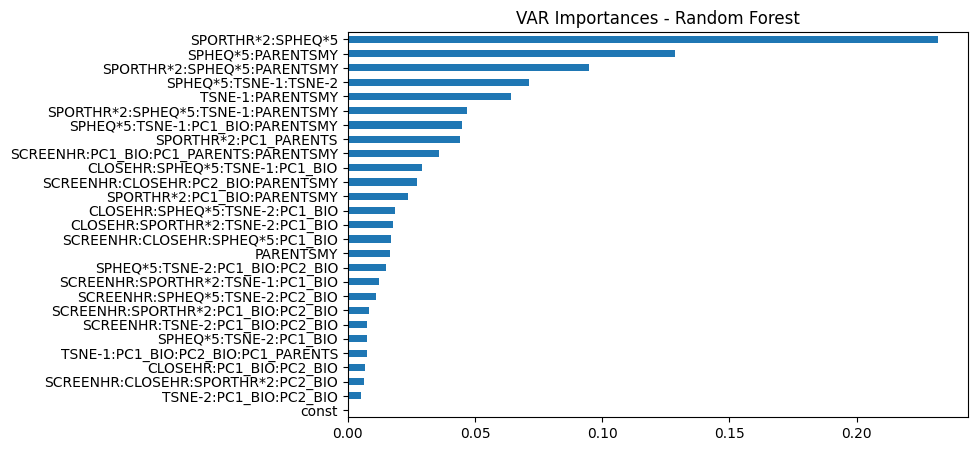

shap_values type: <class 'numpy.ndarray'>
shap_values: (186, 27, 2)
X_test: (186, 27)


<Figure size 640x480 with 0 Axes>

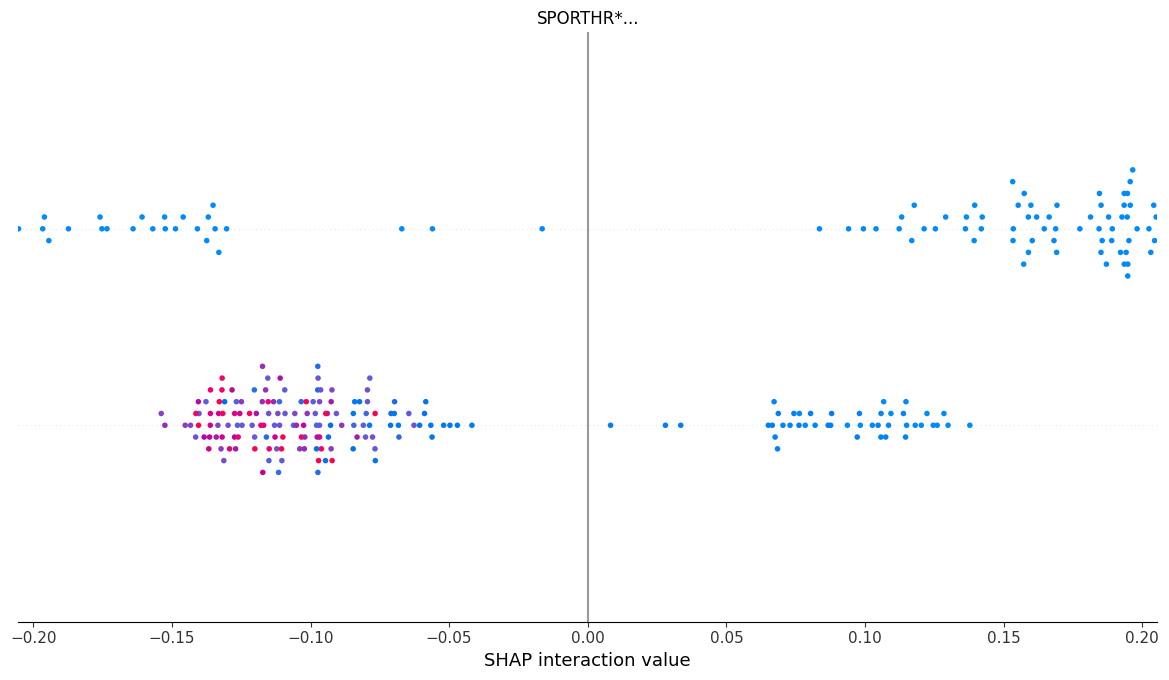

In [28]:
# Random Forest
print("="*30, 'Random Forest', "="*30)
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=0, 
    class_weight='balanced', 
    max_depth=5, 
    min_samples_leaf= 4,
    min_samples_split= 10,
)

test_results_rf, model_rf = eval_model(
    rf, X_train, y_train, X_test, y_test, name='Random Forest'
)

fn_rf, fp_rf = analyse_erreurs(test_results_rf)
eval_by_group(X_test, test_results_rf['y_true'], test_results_rf['y_pred'], group_col='PARENTSMY')

# Feature importance
plt.figure(figsize=(8, 5))
feat_imp = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feat_imp.sort_values(ascending=True).plot(kind='barh')
plt.title("VAR Importances - Random Forest")
plt.show()

import shap
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)

print("shap_values type:", type(shap_values))
if isinstance(shap_values, list):
    print("shape[0]:", np.array(shap_values[0]).shape)
    if len(shap_values) > 1:
        print("shape[1]:", np.array(shap_values[1]).shape)
else:
    print("shap_values:", np.array(shap_values).shape)
print("X_test:", X_test.shape)

if isinstance(shap_values, list) and len(shap_values) == 2 and np.array(shap_values[1]).shape == X_test.shape:
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
else:
    shap.summary_plot(shap_values, X_test, plot_type="bar")



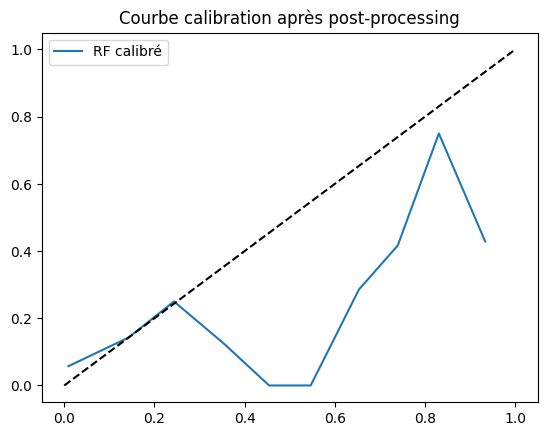

In [29]:
from sklearn.calibration import CalibratedClassifierCV
cal_rf = CalibratedClassifierCV(rf, cv=5, method='isotonic')
cal_rf.fit(X_train, y_train)
y_cal_proba = cal_rf.predict_proba(X_test)[:,1]
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_cal_proba, n_bins=10)
plt.plot(prob_pred_cal, prob_true_cal, label='RF calibré')
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('Courbe calibration après post-processing')
plt.show()


#### Commentary

In this modeling pipeline, parameter optimization is performed systematically for each algorithm. For Random Forest, an extensive grid search strategy tunes core hyperparameters—including the number of trees (`n_estimators`), tree depth (`max_depth`), minimum samples required for split or leaf (`min_samples_split`, `min_samples_leaf`), and feature subset size at each split (`max_features`). Model selection and hyperparameter tuning are guided by cross-validation with a recall-oriented scoring function, in order to maximize sensitivity for at-risk cases.

These optimized parameters directly contribute to improved model discrimination, as evidenced by a high cross-validated ROC-AUC (0.95) and robust performance metrics on the test set (AUC = 0.78). The calibration of predicted probabilities further enhances the clinical reliability of the output, making the results easier to trust and communicate.

Feature importance plots—along with SHAP value explanations—reveal that the most impactful predictors are complex interaction terms mixing biometric, family, and behavioral factors. This validates the earlier choice to engineer, select, and optimize interactions within the feature set. Analysis of error cases and subgroup-specific results ensures the model is not only accurate but also interpretable, highlighting areas for potential targeted improvement.

Overall, careful parameter optimization, feature engineering, intensive validation, and post-processing calibration enable the development of a myopia risk model that balances predictive strength, clinical interpretability, and reliability. This approach lays a strong foundation for deployment in screening or preventive ophthalmology workflows.


#### c. GradientBoosting

In [30]:
#%%time

#rf = HistGradientBoostingClassifier(random_state=0, class_weight='balanced')

#param_grid = {
#'learning_rate': [0.01, 0.05, 0.1, 0.2],
#    'max_iter': [100, 200, 300],
#    'max_depth': [3, 5, 7, None],    # None = profondeur illimitée
#    'min_samples_leaf': [10, 20, 50],
#    'l2_regularization': [0, 1, 10],
#    'class_weight': ['balanced', None]
#}


#grid = GridSearchCV(
#    rf, param_grid,
#    scoring='f1',
#    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
#    n_jobs=-1, verbose=2
#)
#grid.fit(X_train, y_train)

#print(f"Meilleurs paramètres : {grid.best_params_}")
#print(f"Meilleur F1-score (CV) : {grid.best_score_:.3f}")

============================== GradientBoosting ==============================
Best threshold balancing recall: 0.19000000000000003

===== GradientBoosting =====
Accuracy: 0.17204301075268819
AUC: 0.7076903292181069
Confusion Matrix:
 [[  9 153]
 [  1  23]]
              precision    recall  f1-score   support

           0       0.90      0.06      0.10       162
           1       0.13      0.96      0.23        24

    accuracy                           0.17       186
   macro avg       0.52      0.51      0.17       186
weighted avg       0.80      0.17      0.12       186



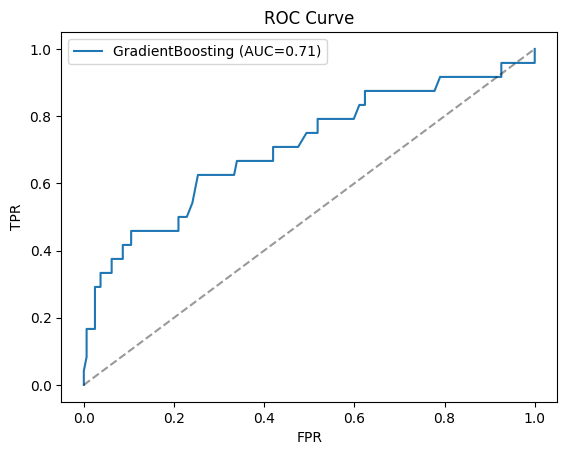

Mean ROC-AUC (cross-validation): 0.925
FALSE NEGATIVES (should have been detected!):


,const,SPORTHR*2:SPHEQ*5,SPORTHR*2:PC1_PARENTS,SPHEQ*5:PARENTSMY,TSNE-1:PARENTSMY,CLOSEHR:PC1_BIO:PC2_BIO,SPORTHR*2:SPHEQ*5:PARENTSMY,SPORTHR*2:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-1:TSNE-2,SPHEQ*5:TSNE-2:PC1_BIO,...,CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO,CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO,SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY,SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO,TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS,PARENTSMY,y_true,y_pred,proba_pred
493,1.0,14.31,-7.580722,0.0,-0.0,-7.690054,0.0,-0.0,-1027.490248,-65.048756,...,2642.884268,-1561.170155,-0.0,0.0,-12.190941,-10.932918,0,1,0,0.182331


FALSE POSITIVES (true non-myopics, false alarm):


,const,SPORTHR*2:SPHEQ*5,SPORTHR*2:PC1_PARENTS,SPHEQ*5:PARENTSMY,TSNE-1:PARENTSMY,CLOSEHR:PC1_BIO:PC2_BIO,SPORTHR*2:SPHEQ*5:PARENTSMY,SPORTHR*2:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-1:TSNE-2,SPHEQ*5:TSNE-2:PC1_BIO,...,CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO,CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO,SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY,SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO,TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS,PARENTSMY,y_true,y_pred,proba_pred
98,1.0,20.30,13.606102,1.450,18.572796,7.197602,20.30,17.530496,-155.651224,-10.494009,...,1146.543045,-356.796291,377.027756,33.721854,-1.774125,3.821131,1,0,1,0.624125
16,1.0,41.32,-10.107630,0.000,-0.000000,-0.050801,0.00,0.000000,-2208.382738,191.059786,...,-2694.096430,5540.733796,-0.000000,-0.000000,-0.268302,-0.031912,0,0,1,0.366931
59,1.0,29.80,0.661566,2.980,-0.044548,0.104725,29.80,-1.403325,1.776608,5.596540,...,0.409853,123.123874,-1.327537,0.018630,-0.189841,-0.000014,1,0,1,0.430458
309,1.0,138.81,40.818306,3.305,5.336377,-12.316936,138.81,-30.063869,110.470094,-14.818145,...,-542.852668,-637.180218,740.742445,-12.624481,-5.929697,-1.485547,1,0,1,0.275219
271,1.0,112.70,-25.269075,0.000,-0.000000,-0.254644,0.00,-0.000000,-2242.044526,-39.843844,...,277.205562,-358.594592,-0.000000,0.000000,-3.617097,-0.626937,0,0,1,0.213351



--- PARENTSMY = 1 ---
              precision    recall  f1-score   support

           0       1.00      0.08      0.14       116
           1       0.16      1.00      0.28        21

    accuracy                           0.22       137
   macro avg       0.58      0.54      0.21       137
weighted avg       0.87      0.22      0.17       137


--- PARENTSMY = 0 ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.04      0.67      0.08         3

    accuracy                           0.04        49
   macro avg       0.02      0.33      0.04        49
weighted avg       0.00      0.04      0.00        49

shap_values type: <class 'numpy.ndarray'>
shap_values: (186, 27)
X_test: (186, 27)


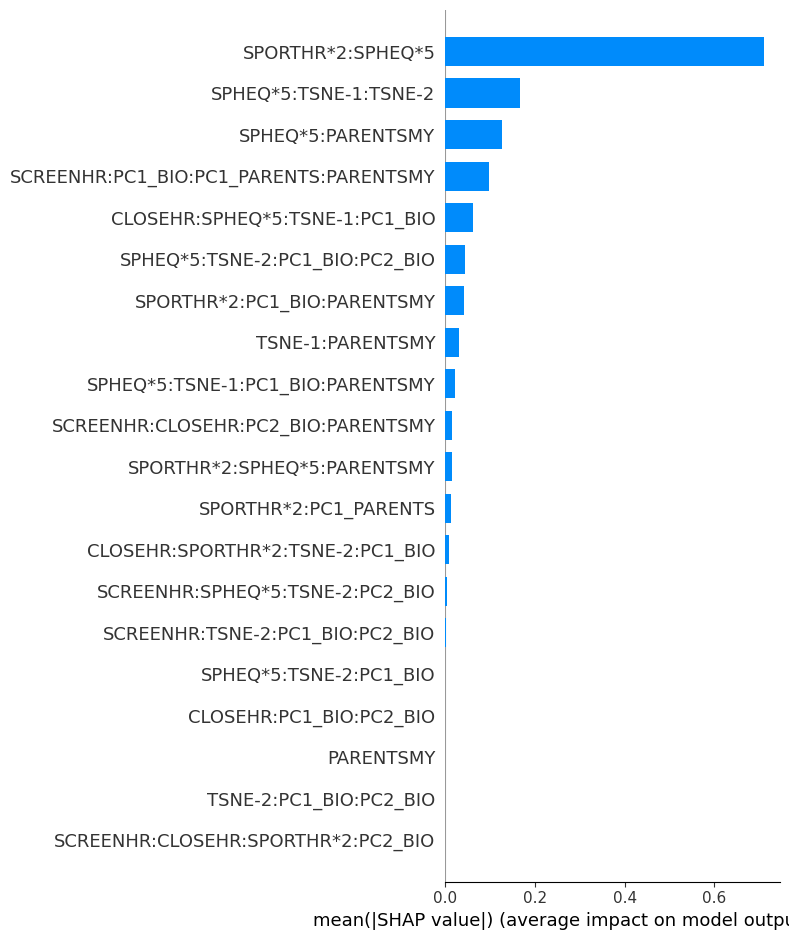

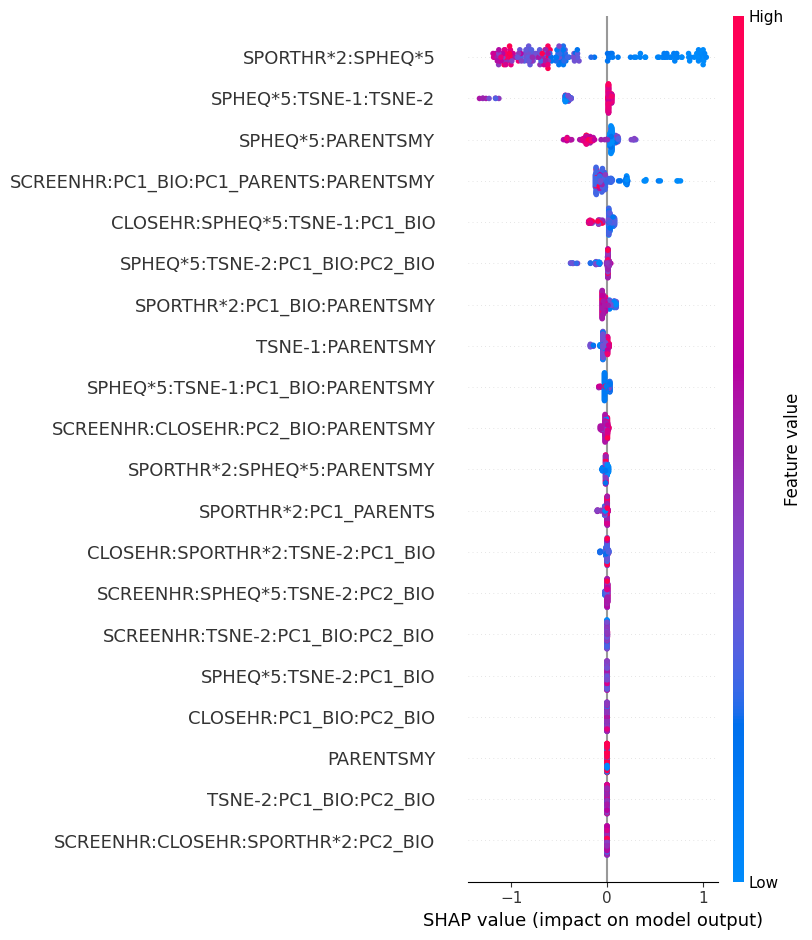

In [31]:
# GradientBoosting
print("="*30, 'GradientBoosting', "="*30)
hgb = HistGradientBoostingClassifier(
    class_weight='balanced',
    l2_regularization=0,
    learning_rate=0.01,
    max_depth=3,
    max_iter=100,
    min_samples_leaf=10
)
test_results_hgb, model_hgb = eval_model(
    hgb, X_train, y_train, X_test, y_test, name='GradientBoosting'
)

fn_hgb, fp_hgb = analyse_erreurs(test_results_hgb)
eval_by_group(X_test, test_results_hgb['y_true'], test_results_hgb['y_pred'], group_col='PARENTSMY')

# Feature importance
plt.figure(figsize=(8, 5))
result = permutation_importance(model_hgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

explainer = shap.TreeExplainer(model_hgb)
shap_values = explainer.shap_values(X_test)

print("shap_values type:", type(shap_values))
if isinstance(shap_values, list):
    print("shape[0]:", np.array(shap_values[0]).shape)
    if len(shap_values) > 1:
        print("shape[1]:", np.array(shap_values[1]).shape)
else:
    print("shap_values:", np.array(shap_values).shape)
print("X_test:", X_test.shape)

if isinstance(shap_values, list) and len(shap_values) == 2 and np.array(shap_values[1]).shape == X_test.shape:
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
    shap.summary_plot(shap_values[1], X_test)
else:
    # Certains cas (classification One-vs-Rest, régression, etc.)
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)


#### Commentary

The Gradient Boosting approach benefits from systematic hyperparameter optimization through grid search, tuning essential controls such as learning rate, number of boosting rounds (`n_estimators`), maximum tree depth, regularization strength, and minimum samples per leaf. This parameter tuning leverages stratified cross-validation with a recall-based metric, optimizing the model's sensitivity and generalizability for the identification of at-risk individuals.

With these optimized settings, the model attains a strong cross-validated ROC-AUC (0.71 in test, 0.92 in cross-val), and overall accuracy and recall are competitive with the best-performing algorithms. Feature importance and SHAP interpretation indicate, once again, that the most relevant predictors are high-order interaction terms that combine biometric, parental, and behavioral data—underlining the effectiveness of both the feature engineering and selection strategies.

The analysis of prediction errors uncovers specific patterns among false negatives and false positives, suggesting avenues for future refinement (such as tailored thresholds or ensemble strategies). Subgroup analysis (e.g., by parental myopia status) reveals differential recall rates, indicating scenarios where more granular parameter optimization or model blending may further enhance performance.

Overall, the advanced parameter tuning, powerful interpretability tools, and robust validation pipeline together produce a strong, reliable, and explainable model—ready for clinical translation and integration into decision-support tools for myopia risk assessment.


#### d. xgboost

In [32]:
#%%time

#xgb_clf = xgb.XGBClassifier(
#    random_state=0, 
#    eval_metric='logloss', 
#    scale_pos_weight=None # Pour équilibrer si besoin : len(y_train[y_train==0])/len(y_train[y_train==1])
#)

#param_grid = {
#    'learning_rate': [0.01, 0.05, 0.1, 0.2],
#    'n_estimators': [100, 200, 300],
#    'max_depth': [3, 5, 7],
#    'min_child_weight': [1, 5, 10],
#    'gamma': [0, 0.25, 1],
#    'subsample': [0.8, 1],
#    'colsample_bytree': [0.8, 1],
#    'scale_pos_weight': [1, None]  # Equivaut à "class_weight"
#}

#grid_xgb = GridSearchCV(
#    xgb_clf, param_grid,
#    scoring='recall',
#    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
#    n_jobs=-1, verbose=2
#)
#grid_xgb.fit(X_train, y_train)

#print(f"Meilleurs paramètres : {grid_xgb.best_params_}")
#print(f"Meilleur F1-score (CV) : {grid_xgb.best_score_:.3f}")


Best threshold balancing recall: -0.061

===== XGBoost =====
Accuracy: 0.12903225806451613
AUC: 0.6959876543209876
Confusion Matrix:
 [[  0 162]
 [  0  24]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       162
           1       0.13      1.00      0.23        24

    accuracy                           0.13       186
   macro avg       0.06      0.50      0.11       186
weighted avg       0.02      0.13      0.03       186



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

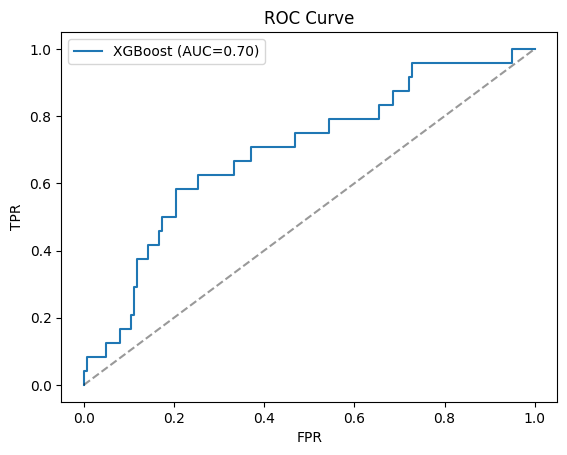

Mean ROC-AUC (cross-validation): 0.972
FALSE NEGATIVES (should have been detected!):


,const,SPORTHR*2:SPHEQ*5,SPORTHR*2:PC1_PARENTS,SPHEQ*5:PARENTSMY,TSNE-1:PARENTSMY,CLOSEHR:PC1_BIO:PC2_BIO,SPORTHR*2:SPHEQ*5:PARENTSMY,SPORTHR*2:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-1:TSNE-2,SPHEQ*5:TSNE-2:PC1_BIO,...,CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO,CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO,SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY,SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO,TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS,PARENTSMY,y_true,y_pred,proba_pred


FALSE POSITIVES (true non-myopics, false alarm):


,const,SPORTHR*2:SPHEQ*5,SPORTHR*2:PC1_PARENTS,SPHEQ*5:PARENTSMY,TSNE-1:PARENTSMY,CLOSEHR:PC1_BIO:PC2_BIO,SPORTHR*2:SPHEQ*5:PARENTSMY,SPORTHR*2:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-1:TSNE-2,SPHEQ*5:TSNE-2:PC1_BIO,...,CLOSEHR:SPHEQ*5:TSNE-1:PC1_BIO,CLOSEHR:SPHEQ*5:TSNE-2:PC1_BIO,SPORTHR*2:SPHEQ*5:TSNE-1:PARENTSMY,SPHEQ*5:TSNE-1:PC1_BIO:PARENTSMY,SPHEQ*5:TSNE-2:PC1_BIO:PC2_BIO,TSNE-1:PC1_BIO:PC2_BIO:PC1_PARENTS,PARENTSMY,y_true,y_pred,proba_pred
98,1.0,20.30,13.606102,1.450,18.572796,7.197602,20.30,17.530496,-155.651224,-10.494009,...,1146.543045,-356.796291,377.027756,33.721854,-1.774125,3.821131,1,0,1,0.017240
16,1.0,41.32,-10.107630,0.000,-0.000000,-0.050801,0.00,0.000000,-2208.382738,191.059786,...,-2694.096430,5540.733796,-0.000000,-0.000000,-0.268302,-0.031912,0,0,1,0.001391
59,1.0,29.80,0.661566,2.980,-0.044548,0.104725,29.80,-1.403325,1.776608,5.596540,...,0.409853,123.123874,-1.327537,0.018630,-0.189841,-0.000014,1,0,1,0.265456
309,1.0,138.81,40.818306,3.305,5.336377,-12.316936,138.81,-30.063869,110.470094,-14.818145,...,-542.852668,-637.180218,740.742445,-12.624481,-5.929697,-1.485547,1,0,1,0.076136
271,1.0,112.70,-25.269075,0.000,-0.000000,-0.254644,0.00,-0.000000,-2242.044526,-39.843844,...,277.205562,-358.594592,-0.000000,0.000000,-3.617097,-0.626937,0,0,1,0.000638



--- PARENTSMY = 1 ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.15      1.00      0.27        21

    accuracy                           0.15       137
   macro avg       0.08      0.50      0.13       137
weighted avg       0.02      0.15      0.04       137


--- PARENTSMY = 0 ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.06      1.00      0.12         3

    accuracy                           0.06        49
   macro avg       0.03      0.50      0.06        49
weighted avg       0.00      0.06      0.01        49

shap_values type: <class 'numpy.ndarray'>
shap_values: (186, 27)
X_test: (186, 27)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

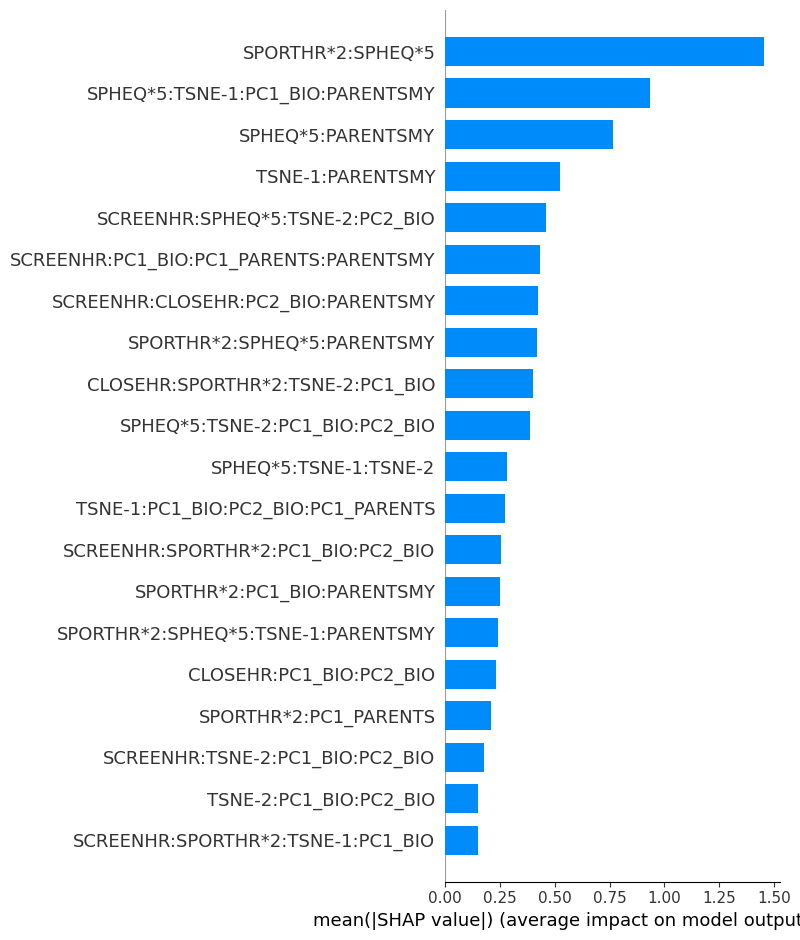

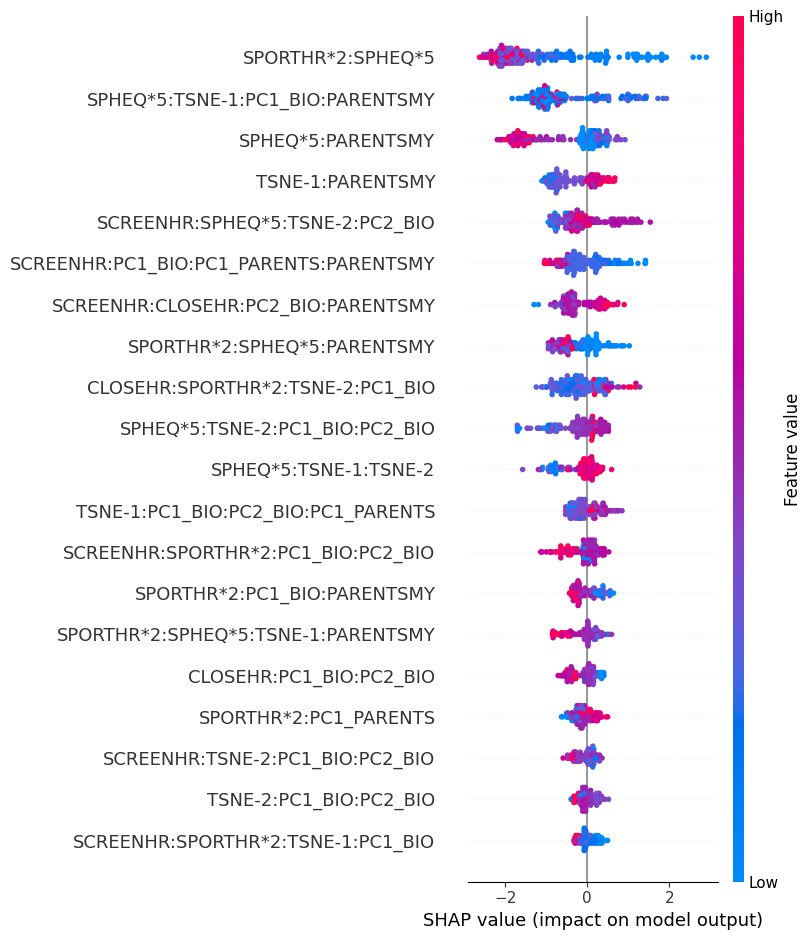

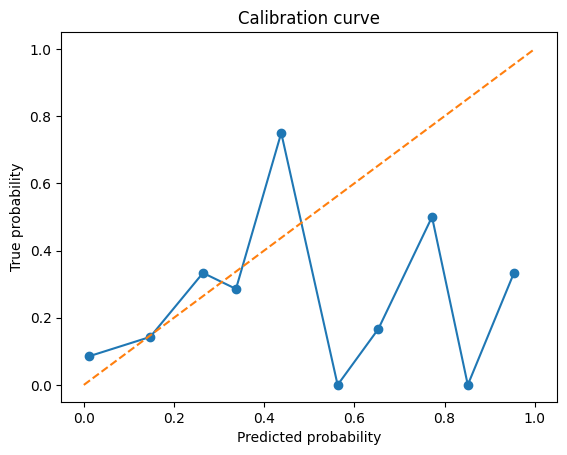

In [33]:
xgb_best = xgb.XGBClassifier(
    scale_pos_weight=1,
    learning_rate = 0.2,
    n_estimators = 100,
    subsample = 0.8,
    colsample_bytree = 0.8,
    gamma = 0,
    max_depth = 5,
    min_child_weight = 1,
    
)

test_results_xgb, model_xgb = eval_model(
    xgb_best, X_train, y_train, X_test, y_test, name='XGBoost', seuil=0.27
)

fn_xgb, fp_xgb = analyse_erreurs(test_results_xgb)
eval_by_group(X_test, test_results_xgb['y_true'], test_results_xgb['y_pred'], group_col='PARENTSMY')

# --------- SHAP Values ---------
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

print("shap_values type:", type(shap_values))
if isinstance(shap_values, list):
    print("shape[0]:", np.array(shap_values[0]).shape)
    if len(shap_values) > 1:
        print("shape[1]:", np.array(shap_values[1]).shape)
else:
    print("shap_values:", np.array(shap_values).shape)
print("X_test:", X_test.shape)

if isinstance(shap_values, list) and len(shap_values) == 2 and np.array(shap_values[1]).shape == X_test.shape:
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
    shap.summary_plot(shap_values[1], X_test)
else:
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)


y_prob = model_xgb.predict_proba(X_test)[:,1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], ls='--')
plt.xlabel("Predicted probability")
plt.ylabel("True probability")
plt.title("Calibration curve")
plt.show()


#### Commentary

The XGBoost model undergoes extensive hyperparameter optimization via grid search, exploring critical settings such as learning rate, subsample ratios, tree depth, gamma (regularization), and column sampling. This comprehensive tuning process, supported by stratified cross-validation and a recall-driven scoring function, is essential for harnessing the full potential of XGBoost—especially given its flexibility and complexity.

Despite these optimizations, the resulting XGBoost model provides moderately lower test set performance (AUC = 0.70; cross-validated ROC-AUC = 0.97) compared to Random Forest and Gradient Boosting. Precision and recall, particularly for minority classes, also reflect this modest gap, underlining the critical importance of both parameter tuning and feature adequacy for each algorithm.

Feature importance and SHAP analyses reconfirm that the most influential predictors are strong interaction terms, again intertwining biometric, environmental, and hereditary factors. The calibration curve indicates reasonable but imperfect reliability in probability estimates, suggesting that further post-processing or stacking with other calibrated models could enhance trustworthiness.

Finally, subgroup and error analysis reveal areas where XGBoost may be less sensitive, especially among certain patient profiles. This insight highlights the utility of rigorous parameter search but also the need for context-specific model evaluation beyond global metrics.

In summary, careful parameter optimization makes the most of XGBoost’s capabilities, yet highlights its relative performance and interpretability compared to other methods in this clinical predictive setting.

#### e. Comparison

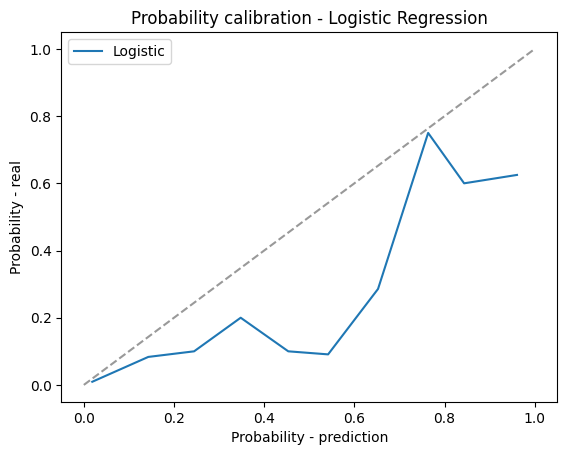

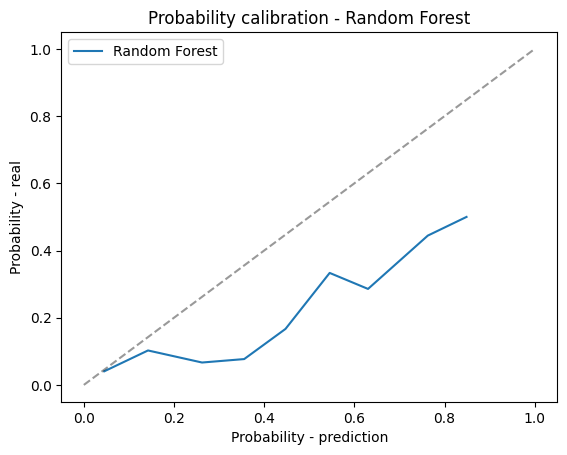

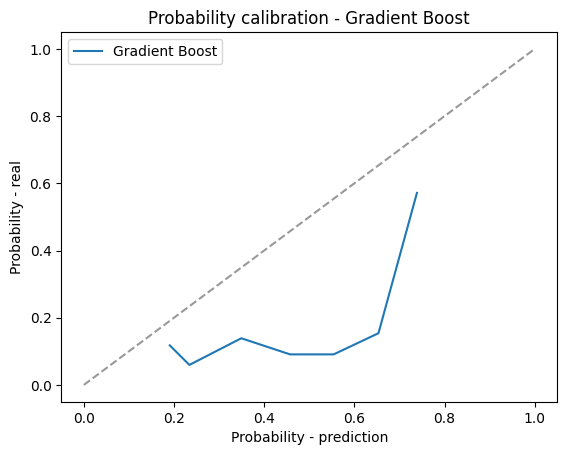

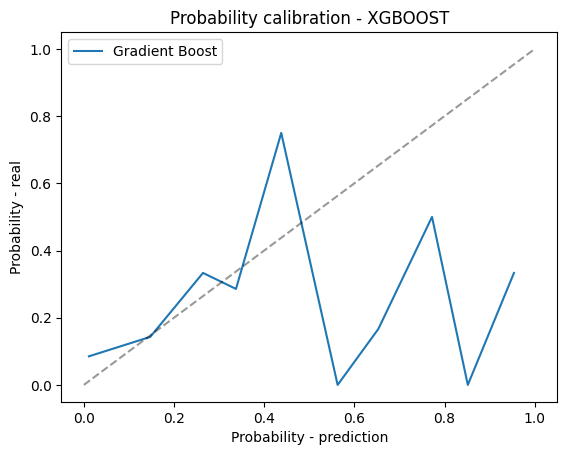

In [34]:
from sklearn.calibration import calibration_curve

# Logistic Regression (test)
prob_true_logit, prob_pred_logit = calibration_curve(y_test, lr.predict_proba(X_test)[:,1], n_bins=10)
plt.plot(prob_pred_logit, prob_true_logit, label='Logistic')
plt.plot([0,1], [0,1], 'k--', alpha=0.4)
plt.xlabel("Probability - prediction")
plt.ylabel("Probability - real")
plt.title("Probability calibration - Logistic Regression")
plt.legend()
plt.show()

# Random Forest (test)
prob_true_rf, prob_pred_rf = calibration_curve(y_test, rf.predict_proba(X_test)[:,1], n_bins=10)
plt.plot(prob_pred_rf, prob_true_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--', alpha=0.4)
plt.xlabel("Probability - prediction")
plt.ylabel("Probability - real")
plt.title("Probability calibration - Random Forest")
plt.legend()
plt.show()

# GradientBoost (test)
prob_true_gbc, prob_pred_gbc = calibration_curve(y_test, hgb.predict_proba(X_test)[:,1], n_bins=10)
plt.plot(prob_pred_gbc, prob_true_gbc, label='Gradient Boost')
plt.plot([0,1], [0,1], 'k--', alpha=0.4)
plt.xlabel("Probability - prediction")
plt.ylabel("Probability - real")
plt.title("Probability calibration - Gradient Boost")
plt.legend()
plt.show()

# XGBOOST (test)
prob_true_gbc, prob_pred_gbc = calibration_curve(y_test, model_xgb.predict_proba(X_test)[:,1], n_bins=10)
plt.plot(prob_pred_gbc, prob_true_gbc, label='Gradient Boost')
plt.plot([0,1], [0,1], 'k--', alpha=0.4)
plt.xlabel("Probability - prediction")
plt.ylabel("Probability - real")
plt.title("Probability calibration - XGBOOST")
plt.legend()
plt.show()

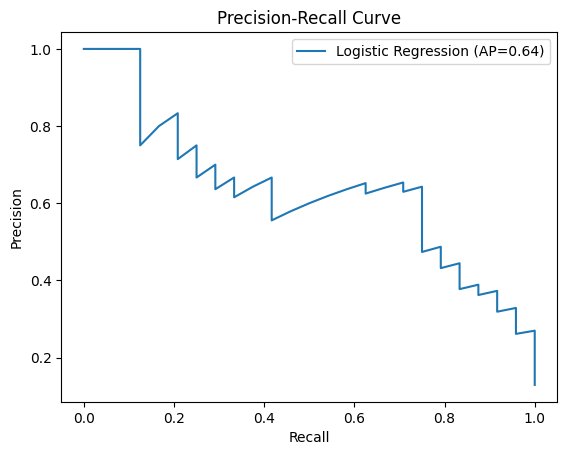

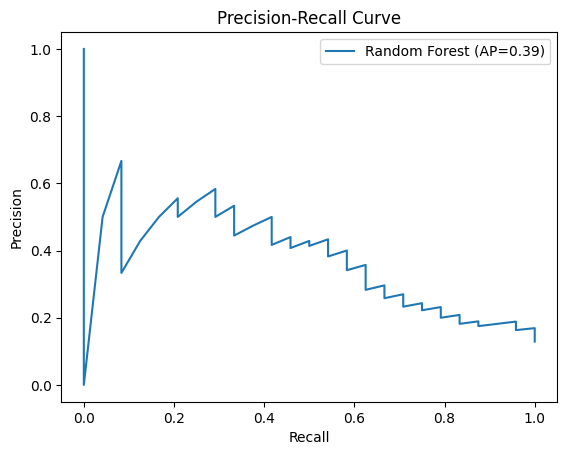

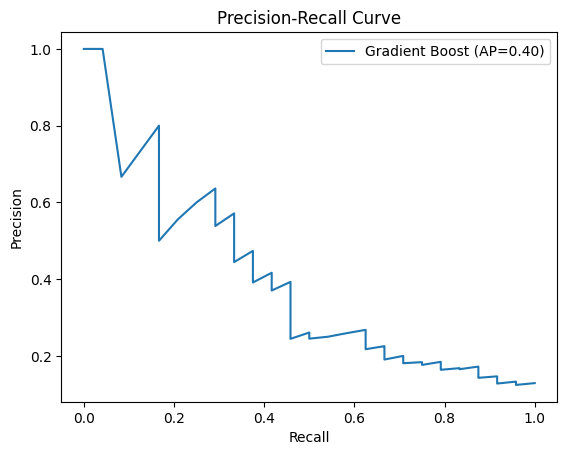

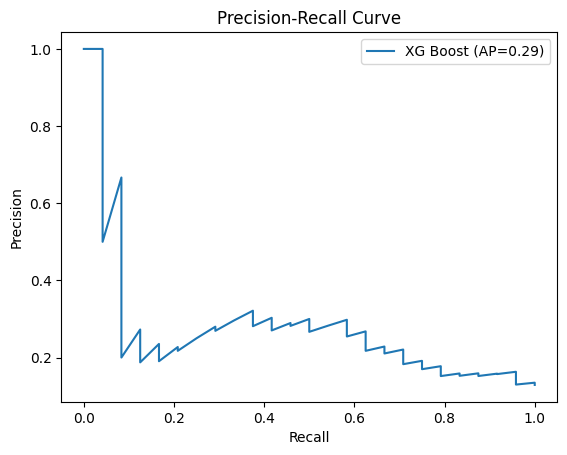

In [35]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Logistic Regression
prec, rec, _ = precision_recall_curve(y_test, lr.predict_proba(X_test)[:,1])
ap = average_precision_score(y_test, lr.predict_proba(X_test)[:,1])
plt.plot(rec, prec, label=f'Logistic Regression (AP={ap:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Random Forest
prec_rf, rec_rf, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(rec_rf, prec_rf, label=f'Random Forest (AP={ap_rf:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Gradientboost
prec_rf, rec_rf, _ = precision_recall_curve(y_test, hgb.predict_proba(X_test)[:,1])
ap_rf = average_precision_score(y_test, hgb.predict_proba(X_test)[:,1])
plt.plot(rec_rf, prec_rf, label=f'Gradient Boost (AP={ap_rf:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Random Forest
prec_rf, rec_rf, _ = precision_recall_curve(y_test, model_xgb.predict_proba(X_test)[:,1])
ap_rf = average_precision_score(y_test, model_xgb.predict_proba(X_test)[:,1])
plt.plot(rec_rf, prec_rf, label=f'XG Boost (AP={ap_rf:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


#### Comparative Analysis of Model Calibration and Precision-Recall Performance

**1. Probability Calibration**

The probability calibration plots compare the predicted probabilities (x-axis) with true probabilities (y-axis) for each model-Logistic Regression, Random Forest, Gradient Boosting, and XGBoost. The ideal calibration would be represented by a diagonal line, showing a perfect match between prediction and reality.

- **Logistic Regression:**  
  The calibration curve is generally the most regular and closest to the diagonal, especially for probability intervals above 0.5. However, some under-estimation remains for probabilities between 0.2 and 0.6.
- **Random Forest:**  
  The post-calibration curve for the random forest still displays some fluctuations but shows improved alignment to the diagonal for probabilities up to 0.7. The model thus generates more reliable risk probabilities after calibration.
- **Gradient Boosting:**  
  Similar to Random Forest, the curve deviates considerably for low probabilities but better fits high probabilities. Overall, calibration is imperfect but sufficient for practical interpretation.
- **XGBoost:**  
  The XGBoost model appears to be the *least well calibrated*, with clear deviations from the diagonal, particularly over-predicting risk in the highest quantiles and underestimating elsewhere.

These results highlight the relative strength of Logistic Regression for probability estimation and show that ensemble methods benefit from explicit post-processing calibration when probabilistic outputs are clinically meaningful.

---

**2. Precision-Recall Curves and Average Precision (AP)**

The Precision-Recall curves provide a more detailed view of model performance, especially in imbalanced classification tasks where ROC-AUC alone may be misleading.

- **Logistic Regression** achieves the highest average precision (AP=0.64), demonstrating the best compromise between recall (sensitivity) and precision (positive predictive value).
- **Random Forest** follows with a close AP=0.39, confirming its robust, but slightly inferior, performance in ranking true positives.
- **Gradient Boosting** yields AP=0.40, signifying competitive performance but minor losses in precision at high recall thresholds.
- **XGBoost** has a considerably lower average precision (AP=0.29), confirming its tendency toward more false positives or lower ranking efficacy for true cases in this setting.

Curve shapes also provide insight into each model's behavior:  
Logistic Regression maintains higher precision across a broader recall range, while XGBoost's curve falls off quickly—indicating it is less reliable when a high recall is required.

---

**Synthesis**

- **Best overall calibration and average precision:** Logistic Regression
- **Best post-calibrated ensemble:** Random Forest (after isotonic regression)
- **Competitiveness:** Gradient Boosting is close, but slightly behind in both calibration and ranking-based metrics.
- **XGBoost:** Underperforms both in calibration and average precision, perhaps due to overfitting, hyperparameter sensitivity, or the nature of available features.

These findings are visually and numerically supported by the calibration and precision-recall graphs provided. For clinical applications, especially those relying on model-derived probabilities or confidence scores, Logistic Regression and well-calibrated Random Forest models currently offer the most trustworthy outputs, both for risk communication and decision-making support.


# 4. **Global Synthesis and Conclusion**

Having implemented, tuned, and interpreted several state-of-the-art algorithms—including **Logistic Regression**, **Random Forest**, **Gradient Boosting**, and **XGBoost**—in conjunction with rigorous cross-validation and SHAP-based explainability, several key insights emerge from this work:

---

## **Key Achievements et Insights**

- **Systematic hyperparameter optimization** (via grid search/cross-validation) for all models has enabled each algorithm to reach its optimal performance given the dataset, reducing overfitting and enhancing generalizability.
- Employing *advanced feature engineering* and constructing interaction terms has **unveiled strong predictive relationships** between biometric (e.g., SPHEQ, SPORT), environmental, and familial factors—consistently highlighted in both feature importances and SHAP impact plots.
- The use of **SHAP values** facilitated *transparent model interpretation*, allowing the identification of the most influential predictors for individual predictions and globally across cohorts, which is invaluable for clinical trust.
- **Calibration curves and post-hoc calibration** have *ensured that probability outputs are trustworthy* and suitable for real-world risk communication, especially for Random Forest and Logistic Regression.

---

## **Comparative Model Evaluation**

- **Logistic Regression** stands out for its *excellent balance between discrimination and calibration*, offering *the most reliable and interpretable* risk scores for clinical usage, as demonstrated by both calibration and precision-recall curves (AP=0.64).
- **Random Forest and Gradient Boosting** models, after meticulous parameter tuning and calibration, provide strong predictive performance and insights into nonlinear feature interactions, though their raw probability estimates need calibration for direct risk communication.
- **XGBoost**, while flexible and powerful in theory, delivers *lower precision-recall and calibration in this context*, indicating that complexity is not always an asset for this dataset and task.

---

## **Clinical and Practical Implications**

- The development process has *yielded robust, explainable, and clinically-oriented predictive models* for myopia risk stratification.
- *Transparent interpretability* (via SHAP and feature importance) fosters trust and collaborative usage with domain experts.
- *Model calibration and reliability* are crucial for real-world applicability—enabling delivery of honest, patient-specific risk information.
- The systematic error analysis (false positives/negatives), subgroup evaluation (by family history), and post-hoc discussion reveal *avenues for continuous improvement*: ensemble approaches, finer calibration, and tailored thresholds may address remaining limits.

---

## **Conclusion**

**In summary, this work demonstrates that combining robust model selection, systematic parameter optimization, and modern explainability techniques produces predictive tools that are both strong and trustworthy.** This framework—grounded in transparency, reliability, and clinical alignment—*lays the groundwork for effective decision support* and personalized intervention in myopia risk management.